# Model statistics

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from keras.models import load_model
import pandas as pd

Using TensorFlow backend.


<IPython.core.display.Javascript object>

In [3]:
def show_history(history, metric):
    plt.plot(history.history[metric])
    plt.plot(history.history["val_" + metric])
    plt.ylabel(metric)
    plt.xlabel("epoch")
    plt.legend(["train " + metric, "validation " + metric], loc="best")
    plt.show()

<IPython.core.display.Javascript object>

# Performance analysis

### Load historic

In [4]:
history = pickle.load(open("historico.pickle", "rb"))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


<IPython.core.display.Javascript object>

### to extract elements in history

In [5]:
history.history.keys()

dict_keys(['val_loss', 'val_binary_accuracy', 'val_categorical_accuracy', 'loss', 'binary_accuracy', 'categorical_accuracy'])

<IPython.core.display.Javascript object>

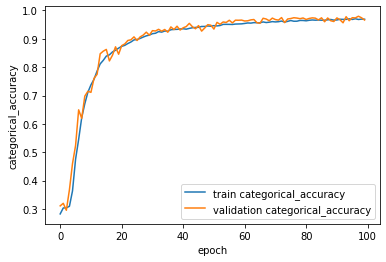

<IPython.core.display.Javascript object>

In [6]:
show_history(history, "categorical_accuracy")

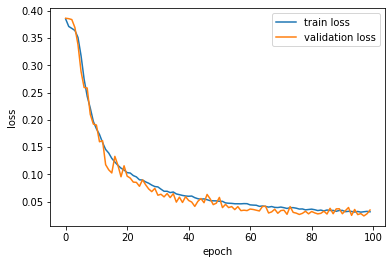

<IPython.core.display.Javascript object>

In [7]:
show_history(history, "loss")

In [8]:
print(
    "Last Train accuracy is: {}%".format(
        np.array(history.history["categorical_accuracy"])[-1].round(4) * 100
    )
)
print(
    "Last Validation accuracy is: {}%".format(
        np.array(history.history["val_categorical_accuracy"])[-1].round(4) * 100
    )
)

Last Train accuracy is: 96.89%
Last Validation accuracy is: 96.61%


<IPython.core.display.Javascript object>

In [9]:
train_acc = pickle.load(open("train_acc_eval.pickle", "rb"))
print("Evaluation Train accuracy is: {}%".format(train_acc[2].round(4) * 100))

Evaluation Train accuracy is: 97.24000000000001%


<IPython.core.display.Javascript object>

In [10]:
test_acc = pickle.load(open("test_acc_eval.pickle", "rb"))
print("Evaluation Test accuracy is: {}%".format(test_acc[2].round(4) * 100))

Evaluation Test accuracy is: 96.61%


<IPython.core.display.Javascript object>

In [11]:
print("Last Train Loss is: {}".format(np.array(history.history["loss"])[-1].round(4)))

print(
    "Last Validation Loss is: {}".format(
        np.array(history.history["val_loss"])[-1].round(4)
    )
)

Last Train Loss is: 0.0315
Last Validation Loss is: 0.0348


<IPython.core.display.Javascript object>

In [12]:
model = load_model("model_new_train.h5")

<IPython.core.display.Javascript object>

In [13]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 64, 64, 16)        448       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 16)        2320      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 16)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)       

<IPython.core.display.Javascript object>

### to get layers configuration

In [14]:
# model.get_config()

<IPython.core.display.Javascript object>

In [15]:
# for nr of epochs

len(history.history["loss"])

100

<IPython.core.display.Javascript object>

In [16]:
f1_score_ft = pickle.load(open("f1_score.pickle", "rb"))

<IPython.core.display.Javascript object>

In [17]:
print("F1 score is: {}".format(f1_score_ft.round(4)))

F1 score is: 0.9661


<IPython.core.display.Javascript object>

### Extracting model elements/parameters:

In [18]:
model_name = "small_first_categ_accuracy"

<IPython.core.display.Javascript object>

In [19]:
model_elem = {
    "model_name": model_name,
    "train_loss": np.array(history.history["loss"])[-1].round(4),
    "val_loss": np.array(history.history["val_loss"])[-1].round(4),
    "train_accuracy": np.array(history.history["categorical_accuracy"])[-1].round(4),
    "val_accuracy": np.array(history.history["val_categorical_accuracy"])[-1].round(4),
    "f1_score": f1_score_ft.round(4),
    "n_epochs": len(history.history["loss"]),
}

<IPython.core.display.Javascript object>

In [20]:
model_elem

{'model_name': 'small_first_categ_accuracy',
 'train_loss': 0.0315,
 'val_loss': 0.0348,
 'train_accuracy': 0.9689,
 'val_accuracy': 0.9661,
 'f1_score': 0.9661,
 'n_epochs': 100}

<IPython.core.display.Javascript object>

In [21]:
pd.DataFrame(model_elem, index=[0])

,model_name,train_loss,val_loss,train_accuracy,val_accuracy,f1_score,n_epochs
0,small_first_categ_accuracy,0.0315,0.0348,0.9689,0.9661,0.9661,100


<IPython.core.display.Javascript object>

### Classification Report

In [22]:
dirs = ["frente", "ft_dt", "ft_esq", "lateral", "tr_drt", "tr_esq", "traseira"]
idx = dirs[:]
idx.extend(["micro avg", "macro avg", "weighted avg"])

<IPython.core.display.Javascript object>

In [23]:
classif_report_df_ft = pickle.load(open("classif_report_df.pickle", "rb"))

<IPython.core.display.Javascript object>

In [24]:
classif_report_df_ft

,f1-score,precision,recall,support
frente,0.963975,0.967391,0.960582,2131.000000
ft_dt,0.955857,0.933665,0.979130,575.000000
ft_esq,0.954663,0.930556,0.980053,752.000000
lateral,0.963964,0.978659,0.949704,338.000000
tr_drt,0.819672,0.842697,0.797872,94.000000
tr_esq,0.979719,0.969136,0.990536,951.000000
traseira,0.976521,0.991287,0.962189,2010.000000
accuracy,0.966136,0.966136,0.966136,0.966136
macro avg,0.944910,0.944770,0.945724,6851.000000
weighted avg,0.966157,0.966615,0.966136,6851.000000


<IPython.core.display.Javascript object>